In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import scipy.stats as stats

In [2]:
data_eth = pd.read_csv(r'C:\Users\dinhn\Downloads\Ethereum Historical Data.csv')
data_eth

,Date,Price,Open,High,Low,Vol.,Change
0,45444.0,3815.95,3762.63,3832.35,3753.32,143.81K,0.01
1,45443.0,3762.66,3747.89,3844.96,3724.57,294.56K,0.00
2,45442.0,3747.55,3767.22,3824.94,3703.74,293.81K,-0.01
3,45441.0,3769.57,3845.56,3886.44,3745.72,353.25K,-0.02
4,45440.0,3845.56,,3929.21,3775.08,436.24K,-0.01
...,...,...,...,...,...,...,...
1915,43529.0,136.82,125.97,141.11,125.44,16.74M,0.09
1916,43528.0,125.97,131.02,131.57,123.25,14.11M,-0.04
1917,43527.0,131.01,132.77,168.42,129.05,10.64M,-0.01
1918,43526.0,132.76,135.72,136.36,130.74,11.29M,-0.02


In [3]:
data_eth.describe()

,Date,Price,High,Low,Change
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,44484.500000,1580.443599,1623.758177,1529.572755,0.002734
std,554.400577,1205.861719,1239.788033,1166.097930,0.044587
min,43525.000000,107.900000,117.910000,88.500000,-0.450000
25%,44004.750000,268.945000,278.095000,262.277500,-0.020000
50%,44484.500000,1622.465000,1654.210000,1569.740000,0.000000
75%,44964.250000,2334.242500,2393.075000,2255.137500,0.020000
max,45444.000000,4808.380000,4864.060000,4715.430000,0.260000


<h1>SKEWNESS</h1>

In [4]:
skewness = stats.skew(data_eth['Price'])
print("Skewness:",skewness)

Skewness: 0.4604188994029928


<h1> Kurtosis </h1>

In [7]:
kurtosis = stats.kurtosis(data_eth['Price'])
print("Kurtosis: ", kurtosis)

Kurtosis:  -0.7273679966545292


<h1> Visualization </h1>
</br>
<h2> Histogram </h2>

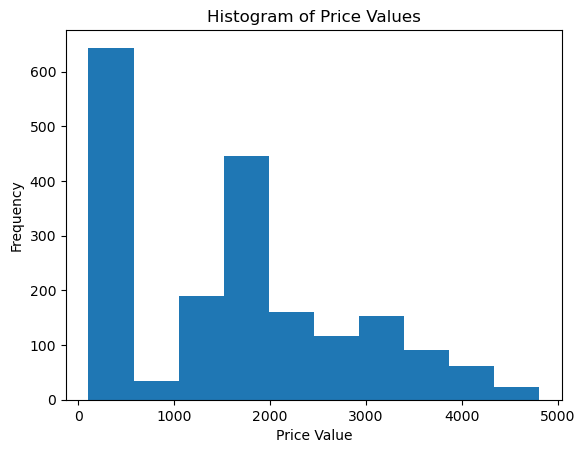

In [9]:
plt.hist(data_eth['Price'])
plt.title("Histogram of Price Values")
plt.xlabel("Price Value")
plt.ylabel("Frequency")
plt.show()

<h2> Boxplot </h2>

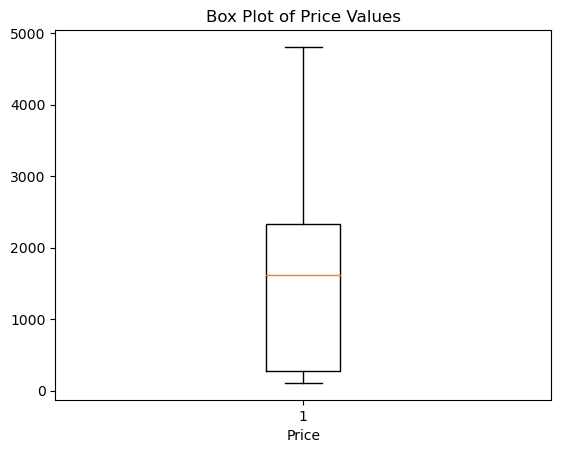

In [10]:
plt.boxplot(data_eth['Price'])
plt.title("Box Plot of Price Values")
plt.xlabel("Price")
plt.show()

In [11]:
# Convert the 'Date' column to datetime format
data_eth['Date'] = pd.to_datetime(data_eth['Date'])

# Set the 'Date' column as the index value
data_eth = data_eth.set_index(pd.DatetimeIndex(data_eth['Date'].values))

# Delete Date from Dataframe
data_eth = data_eth.drop('Date', axis=1)

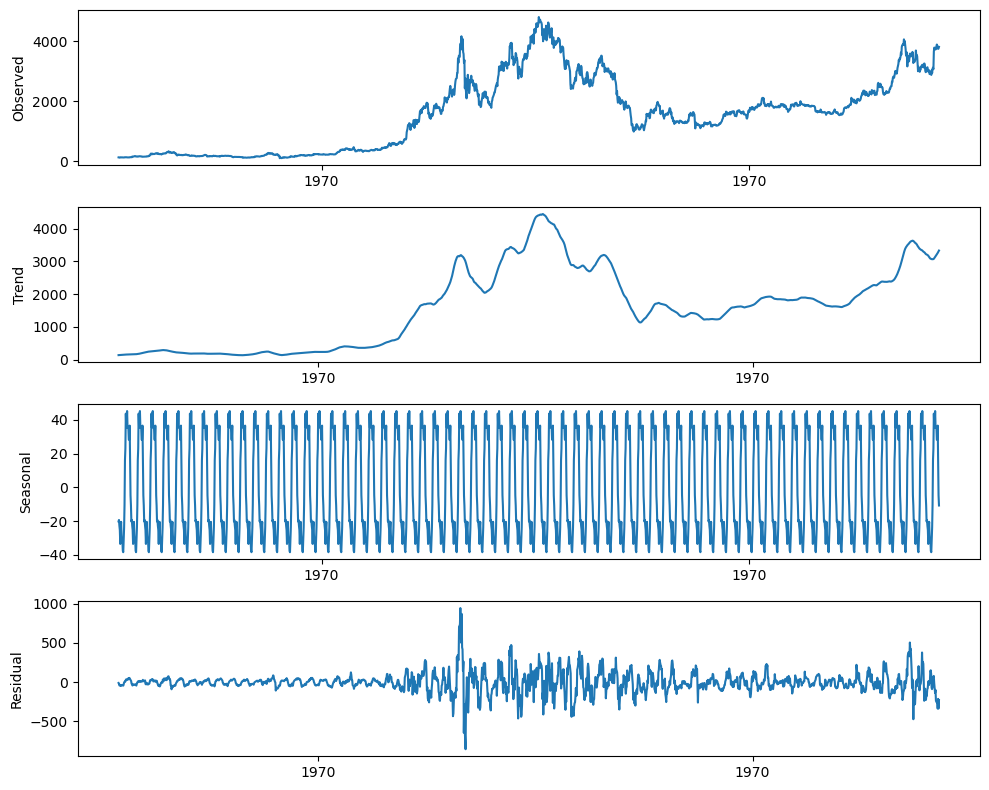

In [12]:
decomposition = sm.tsa.seasonal_decompose(data_eth['Price'], model='add', period=30)
# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

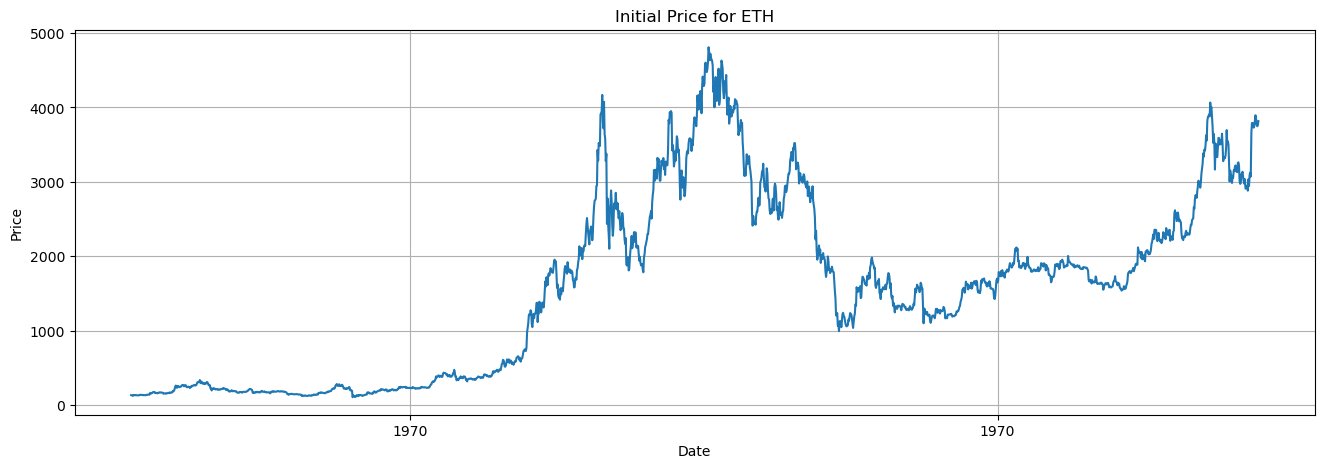

In [14]:
plt.figure(figsize=(16,5))
plt.plot(data_eth.index, data_eth['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Initial Price for ETH')
plt.grid()
plt.show()